## Análise: taxas de acertos e erros das previsões 

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from Utils.DataTransformer import DataTransformer
from Utils.DuckDb.DuckDb import DuckDb
from Utils.DatasetProcessor.DatasetProcessorUtils import DatasetProcessorUtils
from Utils.DataAnalysis import DataAnalysis
import pandas as pd
from Utils import PandasNotebookConfigs
import project_config
import matplotlib.pyplot as plt
from Utils.Datetime import DatetimeUtils
from Utils.Dict import DictUtils
from Utils.Number import NumberUtils

In [4]:
PandasNotebookConfigs.config()

Ajustando display.float.format para %.4f
Ajustando prints de linhas e colunas


In [5]:
# Less than this percentage of certain = Bad Prediction
BAD_PREDICTIONS_THRESHOLD = 0.60

In [6]:
DUCK_DB = DuckDb()
DATA_TRANSFORMER = DataTransformer()
DATA_PROCESSOR_UTILS = DatasetProcessorUtils(DUCK_DB)
DATETIME_UTILS = DatetimeUtils()
DICT_UTILS = DictUtils()
DATA_ANALYSIS = DataAnalysis()
NUMBER_UTILS = NumberUtils()

In [7]:
df = DUCK_DB.load_table(
    project_config.PREDICTED_DATA_TABLE
)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [8]:
len(df)

1251070

In [9]:
# Get only churn labeled data to check why our model isn't predicting well
df = df[df['no_churn_information'] == False]

In [10]:
len(df)

660119

In [11]:
df.head()[['is_churn', 'predicted_is_churn', 'predicted_is_churn_proba_false', 'predicted_is_churn_proba_true']]

,is_churn,predicted_is_churn,predicted_is_churn_proba_false,predicted_is_churn_proba_true
0,True,True,0.2645,0.7355
1,False,False,0.6584,0.3416
5,False,True,0.3422,0.6578
6,False,True,0.4209,0.5791
7,True,True,0.3933,0.6067


In [12]:
bkp_df = df.copy()

In [13]:
df = bkp_df.copy()
len(df)

660119

In [14]:
# Testing
# df = df[:100_000].reset_index()

In [15]:
def create_is_bad_prediction_column(df: pd.DataFrame) -> pd.DataFrame:
    def process(row: pd.Series):
        biggest_proba = max(
            row['predicted_is_churn_proba_false'],
            row['predicted_is_churn_proba_true']
        )
        return biggest_proba < BAD_PREDICTIONS_THRESHOLD
    
    df['is_bad_prediction'] = df.apply(lambda row: process(row), axis=1)
    return df

df = create_is_bad_prediction_column(df)
df.head()

,cost,msno,safra,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_hours,msno_1,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,safra_1,transaction_date_year,transaction_date_month,transaction_date_day,transaction_date_day_of_week,transaction_date_day_of_year,membership_expire_date_year,membership_expire_date_month,membership_expire_date_day,membership_expire_date_day_of_week,membership_expire_date_day_of_year,discount,price_per_month,members_msno,members_safra,is_active,registration_init_time_year,registration_init_time_month,registration_init_time_day,registration_init_time_day_of_week,registration_init_time_day_of_year,_filled_out_members_info,is_churn,no_churn_information,num_unq-2M,num_unq-1M,total_secs-2M,total_secs-1M,num_25-2M,num_25-1M,num_50-2M,num_50-1M,num_75-2M,num_75-1M,num_985-2M,num_985-1M,num_100-2M,num_100-1M,remaining_days,_filled_out_past_info,payment_method_id_6,payment_method_id_8,payment_method_id_10,payment_method_id_11,payment_method_id_12,payment_method_id_13,payment_method_id_14,payment_method_id_15,payment_method_id_16,payment_method_id_17,payment_method_id_18,payment_method_id_19,payment_method_id_20,payment_method_id_21,payment_method_id_22,payment_method_id_23,payment_method_id_26,payment_method_id_27,payment_method_id_28,payment_method_id_29,payment_method_id_30,payment_method_id_31,payment_method_id_32,payment_method_id_33,payment_method_id_34,payment_method_id_35,payment_method_id_36,payment_method_id_37,payment_method_id_38,payment_method_id_39,payment_method_id_40,payment_method_id_41,city_1,city_10,city_11,city_12,city_13,city_14,city_15,city_16,city_17,city_18,city_19,city_20,city_21,city_22,city_3,city_4,city_5,city_6,city_7,city_8,city_9,registered_via_13,registered_via_3,registered_via_4,registered_via_7,registered_via_9,payment_method_id_0,payment_method_id_1,payment_method_id_2,payment_method_id_3,payment_method_id_4,payment_method_id_5,payment_method_id_7,payment_method_id_9,payment_method_id_24,payment_method_id_25,city_0,city_2,registered_via_0,registered_via_1,registered_via_2,registered_via_5,registered_via_6,registered_via_8,registered_via_10,registered_via_11,registered_via_12,registered_via_14,registered_via_15,registered_via_16,registered_via_17,registered_via_18,registered_via_19,safra_year,safra_month,predicted_is_churn,predicted_is_churn_proba_false,predicted_is_churn_proba_true,predict_certain,is_bad_prediction
0,55.9125,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,201609,60,12,14,7,171,179,49996,13.8878,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,7,0,0,False,False,201609,2016,9,9,4,253,2016,9,14,2,258,0,0.0000,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,201609,True,2004,3,27,5,87,Infos já existentes,True,False,179.0000,179.0000,49996.0000,49996.0000,60.0000,60.0000,12.0000,12.0000,14.0000,14.0000,7.0000,7.0000,171.0000,171.0000,5.0000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2016.0000,9.0000,True,0.2645,0.7355,0.7355,False
1,67.3556,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,201611,128,71,50,101,470,488,148668,41.2967,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,30,99,99,True,False,201611,2016,11,16,2,321,2016,12,15,3,350,0,99.0000,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,201611,True,2014,6,8,6,159,Infos já existentes,False,False,488.0000,488.0000,148668.0000,148668.0000,128.0000,128.0000,71.0000,71.0000,50.0000,50.0000,101.0000,101.0000,470.0000,470.0000,29.0000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [16]:
def create_correct_prediction_column(df: pd.DataFrame) -> pd.DataFrame:    
    df['correct_prediction'] = df['is_churn'] == df['predicted_is_churn']
    return df

df = create_correct_prediction_column(df)
df.head(10)[['is_churn', 'predicted_is_churn', 'correct_prediction']]

,is_churn,predicted_is_churn,correct_prediction
0,True,True,True
1,False,False,True
5,False,True,False
6,False,True,False
7,True,True,True
10,False,False,True
11,False,False,True
12,False,False,True
16,False,False,True
17,False,False,True


In [17]:
# df['forced_churn'].value_counts()

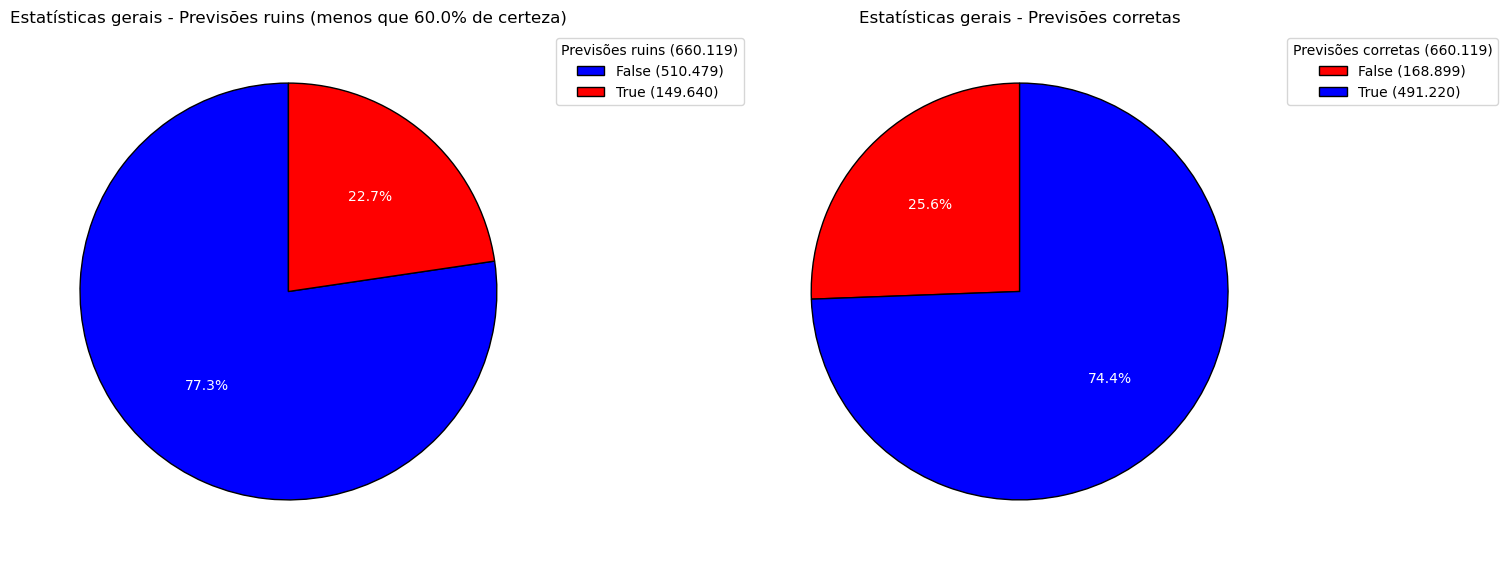

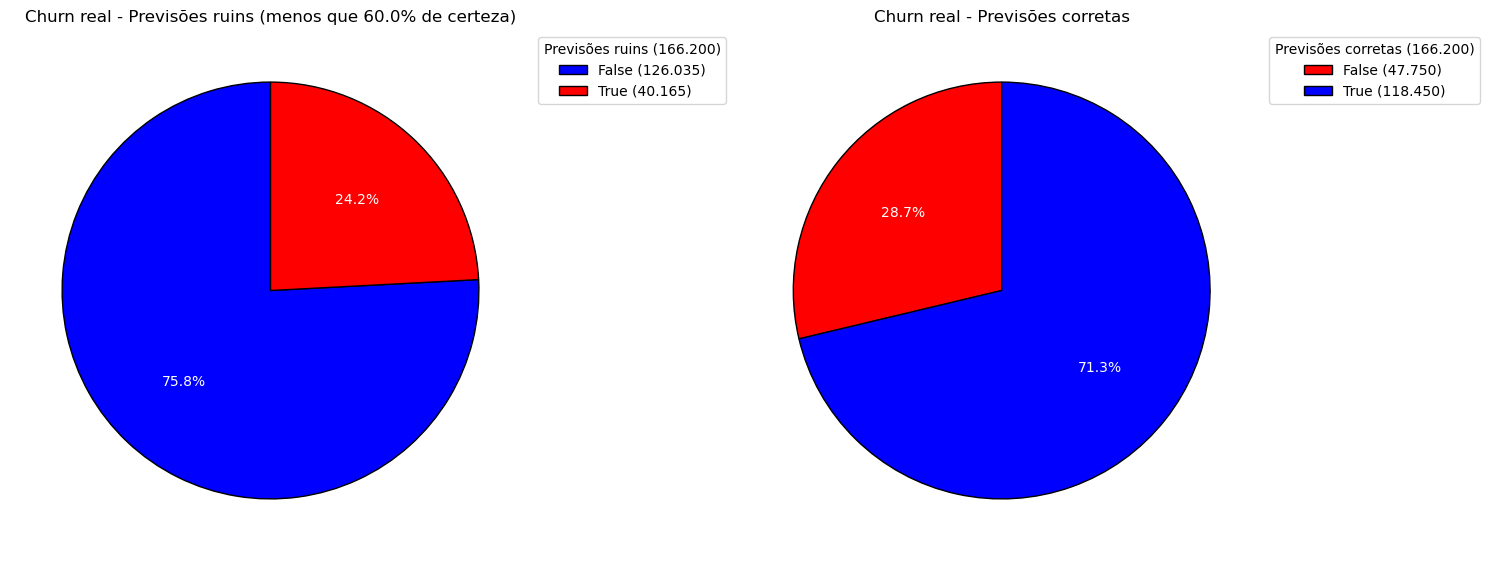

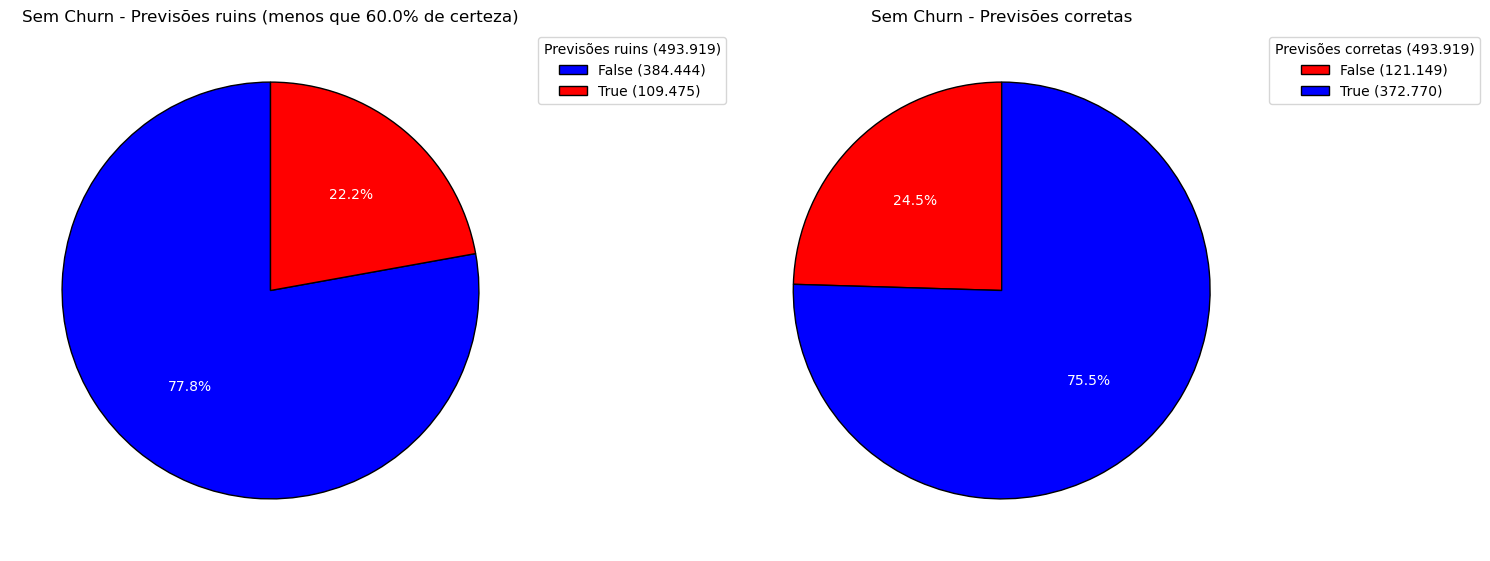

In [27]:
def plot_figures(label: str, df: pd.DataFrame):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
    axes = axes.flatten()

    def generate_labels(counts):
        return [f'{c} ({NUMBER_UTILS.format_integer_number(counts[c])})' for c in counts.index]

    counted = df['is_bad_prediction'].value_counts().sort_index()
    labels = generate_labels(counted)
    DATA_ANALYSIS.plot_pizza(
        value_counts=counted,
        labels=labels,
        title=f'{label} - Previsões ruins (menos que {BAD_PREDICTIONS_THRESHOLD * 100}% de certeza)',
        legend=f'Previsões ruins ({NUMBER_UTILS.format_integer_number(counted.sum())})',
        ax=axes[0],
        colors=['blue', 'red'],
        text_color='white'
    )

    counted = df['correct_prediction'].value_counts().sort_index()
    labels = generate_labels(counted)
    DATA_ANALYSIS.plot_pizza(
        value_counts=counted,
        labels=labels,
        title=f'{label} - Previsões corretas',
        legend=f'Previsões corretas ({NUMBER_UTILS.format_integer_number(counted.sum())})',
        ax=axes[1],
        colors=['red', 'blue'],
        text_color='white'
    )

    plt.tight_layout()
    plt.show()

plot_figures(
    label='Estatísticas gerais',
    df=df
)

plot_figures(
    label='Churn real',
    df=df[df['is_churn'] == True]
)

plot_figures(
    label='Sem Churn',
    df=df[df['is_churn'] == False]
)

In [22]:
good_predictions = df[df['is_bad_prediction'] == False]
poor_predictions = df[df['is_bad_prediction'] == True]

In [23]:
len(good_predictions), len(poor_predictions)

(510479, 149640)

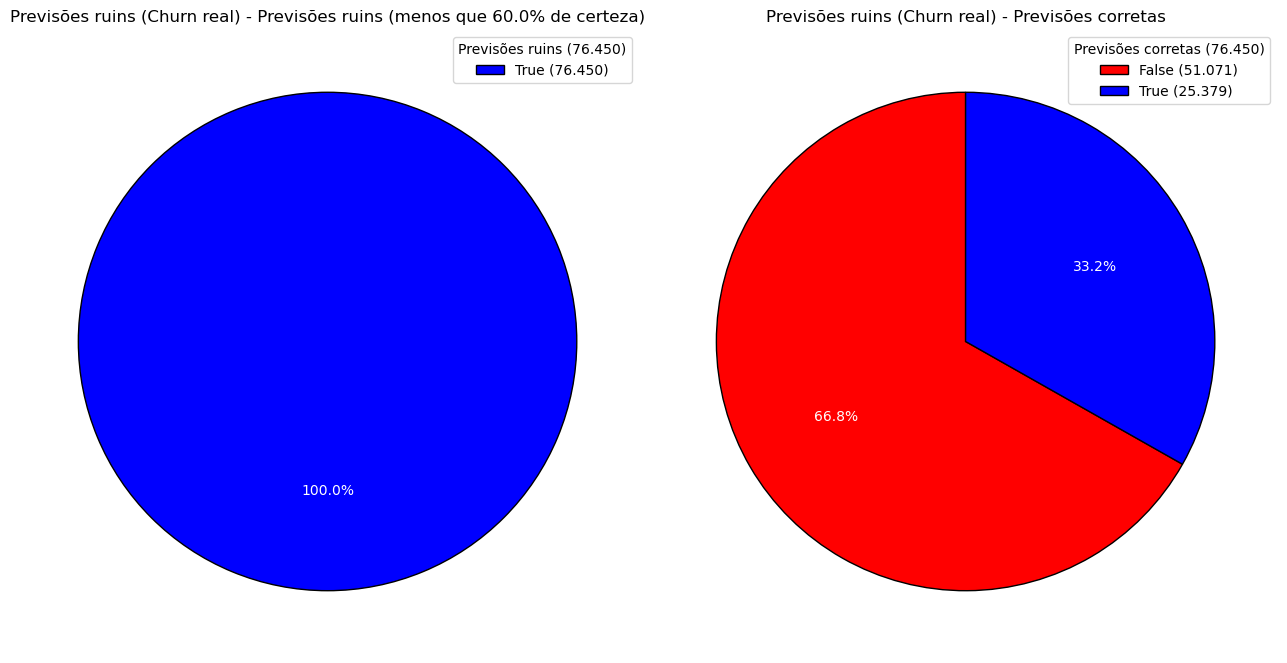

In [28]:
plot_figures(
    label='Previsões ruins (Churn real)',
    df=poor_predictions[(poor_predictions['predicted_is_churn'] == True)]
)

# plot_figures(
#     label='Poor predictions (False churn)',
#     df=poor_predictions[(poor_predictions['predicted_is_churn'] == False)]
# )

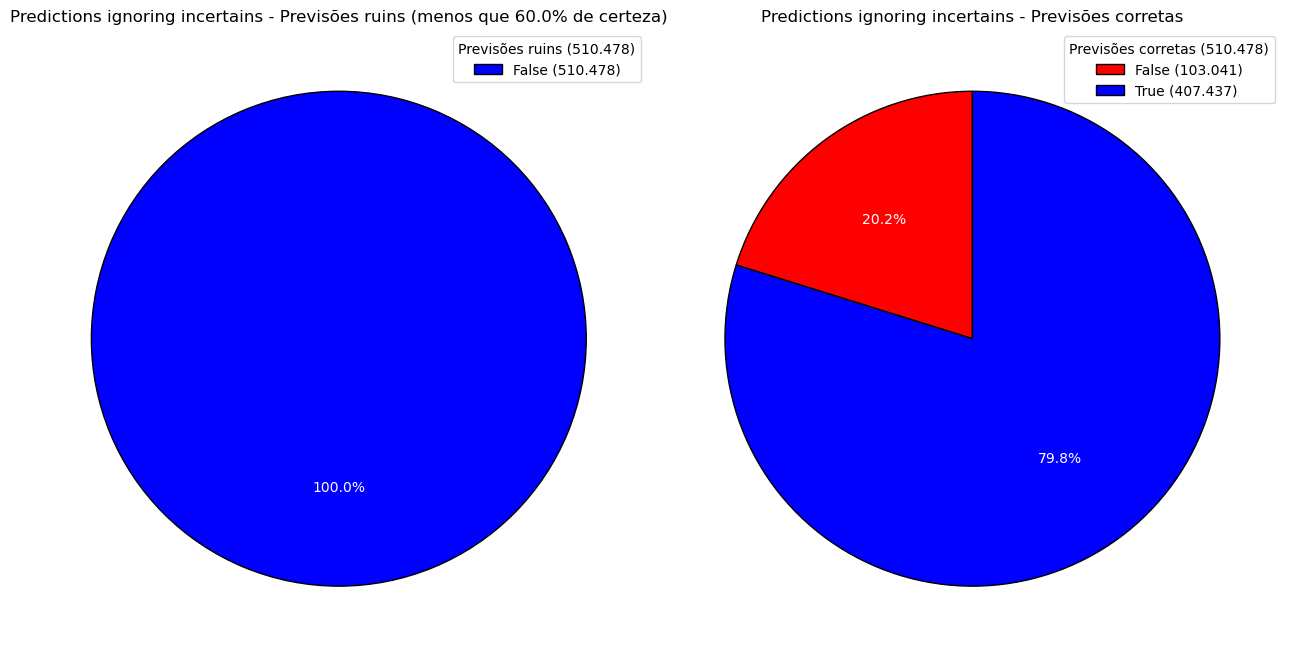

In [29]:
plot_figures(
    label='Predictions ignoring incertains',
    df=df[(df['predict_certain'] > BAD_PREDICTIONS_THRESHOLD)]
)